### ML model for fruits detection

#### Importing neccessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Reading data 

In [2]:
fruit_data = pd.read_csv("fruits.csv")

In [3]:
fruit_data.shape

(59, 7)

In [4]:
fruit_data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


#### Data visualization

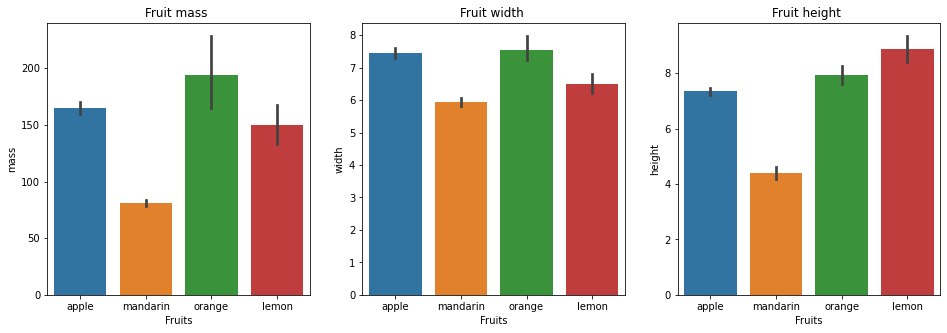

In [5]:
fig , axes = plt.subplots(1,3 ,figsize=(16,5))
axes[0 ].set_title("Fruit mass ")
sns.barplot(fruit_data.fruit_name , fruit_data.mass,ax=axes[0] )
axes[0].set_xlabel('Fruits')
axes[0].set_ylabel("mass");

axes[1 ].set_title("Fruit width ")
sns.barplot(fruit_data.fruit_name , fruit_data.width,ax = axes[1] )
axes[1].set_xlabel('Fruits')
axes[1].set_ylabel("width");

axes[2 ].set_title("Fruit height ")
sns.barplot(fruit_data.fruit_name , fruit_data.height ,ax = axes[2])
axes[2].set_xlabel('Fruits')
axes[2].set_ylabel("height");

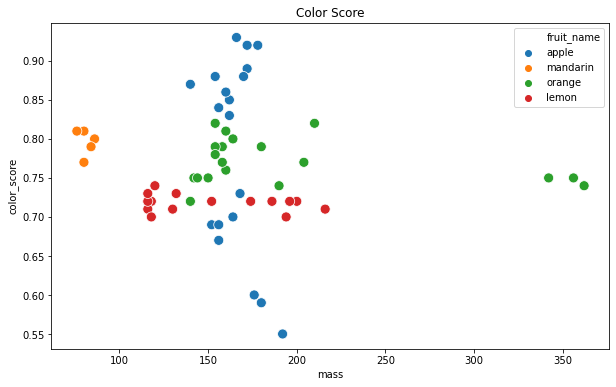

In [6]:
plt.figure(figsize=(10, 6))
plt.title('Color Score')

sns.scatterplot(fruit_data.mass, 
                fruit_data.color_score, 
                hue=fruit_data.fruit_name,
                s=100);

#### Spliting the dataset into two parts test set and train set 

In [7]:
feature_names = ['mass', 'width', 'height']    
X = fruit_data[feature_names]    
y = fruit_data['fruit_label']    
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)    
from sklearn.preprocessing import MinMaxScaler    
scaler = MinMaxScaler()    
X_train = scaler.fit_transform(X_train)    
X_test = scaler.transform(X_test)

#### Using k-nearest neighbors algorithm for modelling the dataset

In [8]:
from sklearn.neighbors import KNeighborsClassifier    
knn = KNeighborsClassifier()    
knn.fit(X_train, y_train)    
print('KNeighborsClassifier:')    
print('Accuracy of on training set: {:.2f}'    
     .format(knn.score(X_train, y_train)))    
print('Accuracy of test set: {:.2f}'    
     .format(knn.score(X_test, y_test)))  

KNeighborsClassifier:
Accuracy of on training set: 0.91
Accuracy of test set: 0.75


#### The KNN model runs on the validation set to find the best final accuracy

In [11]:
from sklearn.metrics import classification_report    
from sklearn.metrics import confusion_matrix    
from sklearn.metrics import accuracy_score    
pred = knn.predict(X_test)    
print("Accuracy : ",accuracy_score(y_test, pred))    
print("\nconfusion matrix \n",confusion_matrix(y_test, pred))    
print(classification_report(y_test, pred)) 

Accuracy :  0.75

confusion matrix 
 [[2 0 1 0]
 [0 2 0 0]
 [1 0 1 0]
 [0 0 1 4]]
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       1.00      1.00      1.00         2
           3       0.33      0.50      0.40         2
           4       1.00      0.80      0.89         5

    accuracy                           0.75        12
   macro avg       0.75      0.74      0.74        12
weighted avg       0.81      0.75      0.77        12





**Made with 💙 by Ayush Kushwaha**